In [1]:
%matplotlib inline

In [2]:
from fastai.text import *

### data

The dataset is a dataset of 100k reviews on IMDB curated by Andrew Maas et al. 25k of which are labelled for training, 25k for testing. The remaining 50k is unlabelled. At this point, if you remember ULMFiT, you'll know the unlabelled reviews can be utilised too.

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[WindowsPath('C:/Users/htngu/.fastai/data/imdb_sample/data_save.pkl'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df.shape

(1000, 3)

As per usual, we can reate a databunch based on these texts.

In [6]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [7]:
data_lm.save()

In this one-line code, the library tokenizes the texts and numericalizes them, basically transforming them into numerical vectors. We'll dive into more details...

In [8]:
data = load_data(path)

###  Tokenization

This splits raw text into words, or "tokens". Naively, one can do so by splitting by spaces. That of course is not enough as there are punctuations or words consisting of multiple words (in Vietnamese for example) or words being contractions of multiple words e.g. don't = do not etc. etc.
This often means we have to a bit more meticulous.

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


### Numericalization

After tokenization, we can numericalize the text by transforming them into array of numbers where the numbers are basically indices for the tokens. We can further more define very rare words to all be within the unknown token "UNK".

The mapping between the indices to tokens is store in the _vocab_ attribute of the data object, in a dictionary called _itos_ (= int to string)

The tokens:

In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

The tokenized text:

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj this is a wonderfully written and well acted psychological drama . xxmaj it is not really a horror flick so those looking for something like xxmaj the xxmaj ring or xxmaj the xxmaj grudge will be disappointed . xxmaj what really surprised me about this film was the intelligence and subtle attention to detail in the plot and the effort made to be xxunk consistent . i also appreciated the absence of xxmaj dr. xxmaj phil xxunk or xxmaj new xxmaj age xxunk . xxmaj rather than xxunk an agenda , the filmmakers just told the story , told it well and let the viewer think about it . xxmaj the sparse dreamscapes were reminiscent of xxmaj xxunk paintings and amazingly effective . 
 
  a great example of how to make a good film on a small budget , without big studios , star actors , big - name directors ( this was far better than many of xxmaj hitchcock 's films ) , special effects or " clever " plot twists .

The numericalized version:

In [12]:
data.train_ds[0][0].data[:10]

array([   2,    5,   21,   16,   13, 1677,  389,   12,   88,  933], dtype=int64)

### Using the fastai data block API

In [3]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

NameError: name 'path' is not defined

In [9]:
bs=8

In [4]:
path = untar_data(URLs.IMDB)
path.ls()

[WindowsPath('C:/Users/htngu/.fastai/data/imdb/data_lm.pkl'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/imdb.vocab'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/models'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/README'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/test'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/tmp_clas'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/tmp_lm'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/train'),
 WindowsPath('C:/Users/htngu/.fastai/data/imdb/unsup')]

We seek to train a language model on the reviews text. Note that we can leverage unlabelled text as well since the language model seeks to learn the semantic structure. To this end, we note that label for the data block object is specified with .label_for_lm()

In [10]:


data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
#data_lm.save('data_lm.pkl')

In [7]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [8]:
data_lm.show_batch()

idx,text
0,"do n't bother with this one , go see xxmaj new xxmaj jack xxmaj city , xxmaj ricochet or watch xxmaj new xxmaj york xxmaj undercover for xxmaj ice - t , or xxmaj boyz n the xxmaj hood , xxmaj higher xxmaj learning or xxmaj friday for xxmaj ice xxmaj cube and see the real deal . xxmaj ice - t 's horribly cliched dialogue alone makes this film"
1,"preview mode , as i already would guess what will happen , the music was so bad , with a horrible lip sync song that made me wanna punch the screen . \n \n xxmaj overall avoid this crappy movie . \n \n xxmaj save some money . xxbos i knew i was in for a xxup long 90 minutes when the opening voice over mispronounced the word"
2,"wooden as the dialogue . xxmaj give this one a miss . xxbos i actually trawled through the entire set of reviews , searching for the ones which gave this film less than 5 stars . xxmaj they were few and far between . xxmaj which is utterly baffling ! xxmaj yes , i know it 's a xxmaj disney film and it is n't directed by xxmaj christopher xxmaj"
3,"because it 's everything xxmaj hollywood 's most expensive efforts have become - a bunch of cheap cliches running from one expensive explosion to another . xxmaj oh yes , the whole thing is permeated by a xxmaj neanderthal conservative outlook on sex , politics and so on . xxbos i like action movies . i have a xxunk for "" b "" flicks with bad dialogue and wooden acting"
4,"with well done xxup cgi , nice acting , a beautiful environment and an above - average fantasy story . \n \n xxmaj if you have read the book like me about 10 times or more and really love it , do n't expect too much ( or better : do n't expect anything at all ) . xxmaj the story is totally different from the original book ."


In [6]:

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


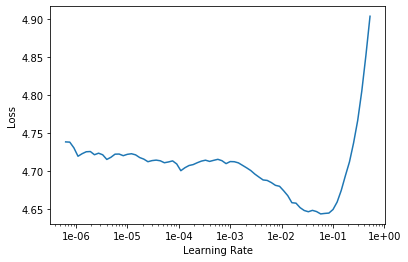

In [20]:
learn.lr_find();
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [7]:
#learn.save('fit_head');
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos xxmaj once again xxmaj mr. xxmaj costner has dragged out a movie for far longer than necessary . xxmaj aside from the terrific sea rescue sequences , of which there are very few i just did not care about any of the characters . xxmaj most of us have ghosts in the closet , and xxmaj costner 's character are realized early on , and then forgotten until much later , by which time i did not care . xxmaj the character we should really care about is a very cocky , overconfident xxmaj ashton xxmaj kutcher . xxmaj the problem is he comes off as kid who thinks he 's better than anyone else around him and shows no signs of a cluttered closet . xxmaj his only obstacle appears to be winning over xxmaj costner . xxmaj finally when we are well past the half way point of this stinker , xxmaj costner tells us all about xxmaj kutcher 's ghosts . xxmaj we are told why xxmaj kutcher is driven to be the best with no 

In [8]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60000, bias=True)
    (output_dp): RNNDropout()
  )
)

### unfreeze and fine-tuning 

In [13]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


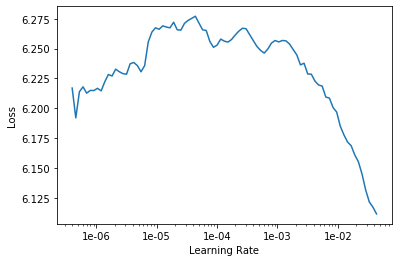

In [13]:
learn.lr_find(1e-7, 1e-1); learn.recorder.plot()

In [14]:
learn.fit_one_cycle(8, 3e-3, moms=(.8, .7))

epoch,train_loss,valid_loss,accuracy,time
0,4.525261,4.405602,0.272644,57:51
1,4.345474,4.210592,0.285535,57:44
2,4.275445,4.174564,0.287515,56:57
3,4.281159,4.157369,0.289155,8:46:41
4,4.287610,4.138679,0.291000,59:24
5,4.246034,4.123674,0.293269,56:58
6,4.251992,4.117077,0.294437,1:01:02
7,4.178379,4.115969,0.294697,1:00:02


In [15]:
learn.save('fine_tuned')
#learn.load('fine_tuned')

In [16]:
learn.save_encoder('fine_tuned_enc')

In [20]:
TEXT = 'I hate this movie because'
N_WORDS = 30
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I hate this movie because it 's absolutely terrible . It is bad , but it is just an amazing movie . What s saying is that " Will i ruin the
I hate this movie because it just ends up with the love of watching . The only thing i do really recommend is i hate movies like that . i would like to watch


### building the classifier 

In [21]:
path = untar_data(URLs.IMDB)

In [22]:


data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [ ]:
#data_clas = load_data(path, 'data_clas.pkl', bs=bs)

We build the model based on the previously trained encoder.

In [29]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj story of a man who has unnatural feelings for a pig . xxmaj starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane , violent mob by the crazy xxunk of it 's singers . xxmaj unfortunately it stays absurd the xxup whole time with no general narrative eventually making it just too off putting . xxmaj even those from the era should be turned off . xxmaj the cryptic dialogue would make xxmaj shakespeare seem easy to a third grader . xxmaj on a technical level it 's better than you might think with some good cinematography by future great xxmaj vilmos xxmaj zsigmond . xxmaj future stars xxmaj sally xxmaj kirkland and xxmaj frederic xxmaj forrest can be seen briefly .,xxbos xxmaj airport ' 77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman xxmaj philip xxmaj steven

Then we proceed to train, this time with gradual unfreezing and discriminative learning rates as additional tricks

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


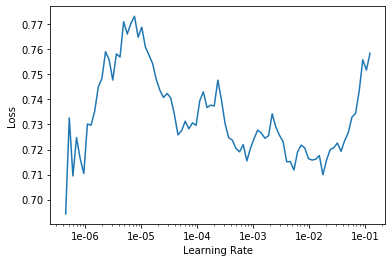

In [30]:
learn.lr_find(1e-7, 3e-1); learn.recorder.plot()

In [31]:
learn.fit_one_cycle(4, 3e-3, moms=(.8, .7))

epoch,train_loss,valid_loss,accuracy,time
0,0.646965,0.622128,0.639040,21:16
1,0.651683,0.600770,0.683400,21:02


RuntimeError: CUDA error: unspecified launch failure

I must note that our result is much worse in 1-epoch than compared to Jeremy's, I wonder if my small bs is an issue. Probably is but the gap seems slightly over the top. Running with 4 epochs to check.

In [27]:
learn.save('first-iter')
#learn.load('first-iter')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle()

So where does the magic number 2.6 come from? This actually has never been published but Jeremy said he ran loads of models with various configs then use a RF to predict the model performance in terms of the parameters, he then use RF interpretation approaches to figure out what seems to be the optimal parameter for the discriminative learning rate ratio. Out comes 2.6.

Neat. Jeremy credits Frank Hatter among others to have some interesting work regarding using RFs to find optimal set of hyperparams. 

In [ ]:
learn.save('second-iter')
#learn.load('second-iter')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle()

In [ ]:
learn.save('third-iter')
#learn.load('third-iter')

Finally, we unfreeze the entire thing and just train all layers

In [ ]:
learn.unfreeze()
learn.fit_one_cycle()